In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob
mpl.rcParams.update({"font.size": 16})

In [2]:
files = glob.glob("*/training.log")
print(files)

['002/training.log', '003/training.log', '004/training.log', '005/training.log', '006/training.log', '007/training.log']


In [3]:
import csv

In [4]:
data = {}
for file in files:
    try:
        key = file.split('/')[0]
        data[key] = np.genfromtxt(file, dtype=float, delimiter=',', names=True) 
    except:
        pass

In [5]:
keys = list(data)
print(keys)

['002', '003', '004', '005', '006', '007']


In [6]:
data[keys[0]].dtype.names

('epoch', 'loss', 'val_loss')

In [7]:
data[keys[0]].dtype.names

('epoch', 'loss', 'val_loss')

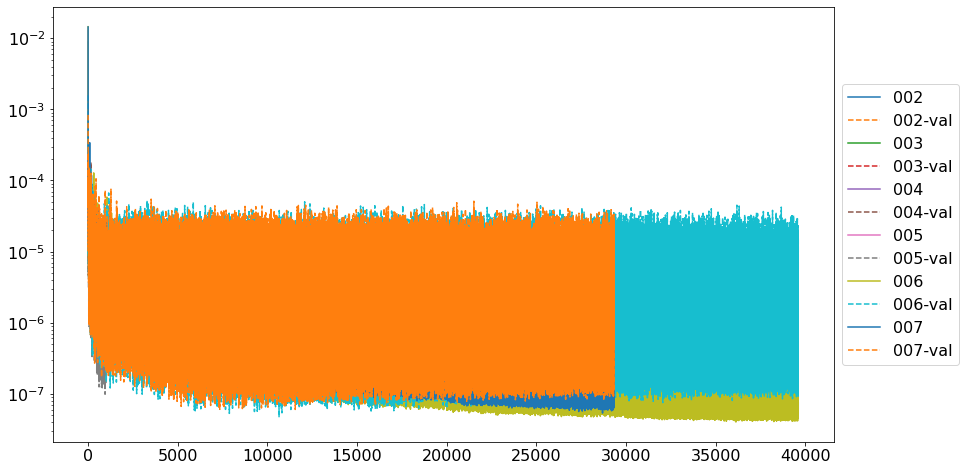

In [8]:
plt.figure(figsize=(14, 8))

for key in keys:
    plt.plot(data[key]['epoch'], data[key]['loss'], label=key)
    plt.plot(data[key]['epoch'], data[key]['val_loss'], label=key+"-val", ls='--')

plt.yscale('log')
# plt.xscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

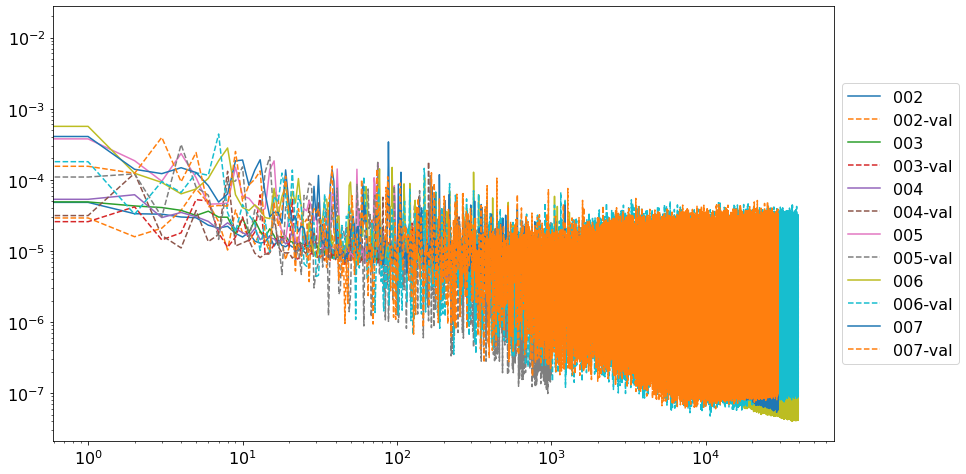

In [9]:
plt.figure(figsize=(14, 8))

for key in keys:
    plt.plot(data[key]['epoch'], data[key]['loss'], label=key)
    plt.plot(data[key]['epoch'], data[key]['val_loss'], label=key+"-val", ls='--')

plt.yscale('log')
plt.xscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

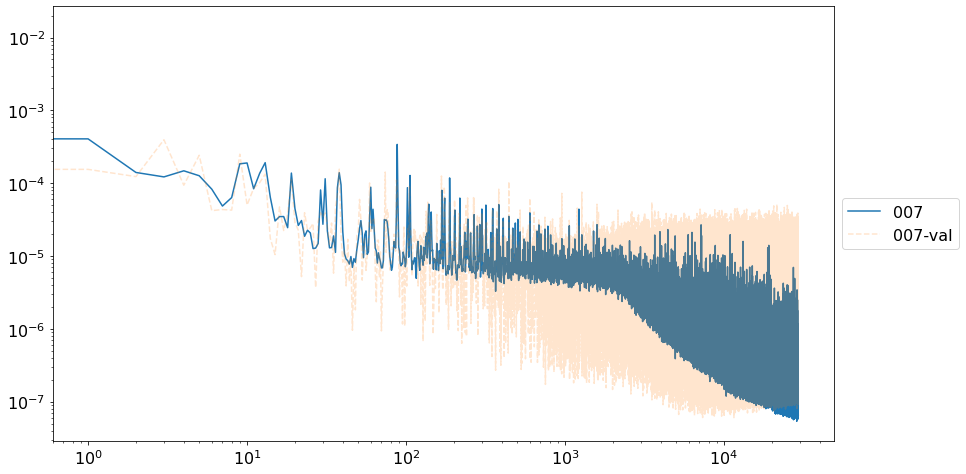

In [10]:
plt.figure(figsize=(14, 8))

key = '007'
plt.plot(data[key]['epoch'], data[key]['loss'], label=key)
plt.plot(data[key]['epoch'], data[key]['val_loss'], label=key+"-val", ls='--', alpha=0.2)

plt.yscale('log')
plt.xscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [11]:
for key in keys:
    print(key, np.atleast_1d(data[key]['epoch'])[-1], np.atleast_1d(data[key]['loss'])[-1], np.atleast_1d(data[key]['val_loss'])[-1])

002 999.0 3.7619263366650557e-06 8.127009095915128e-06
003 995.0 4.796339680979145e-07 9.16224507818697e-06
004 639.0 5.348157401385834e-07 9.082777069124859e-06
005 999.0 4.855768111156067e-06 1.2544469427666627e-05
006 39598.0 7.411263425183279e-08 1.5489124052692205e-05
007 29331.0 6.500048499447075e-08 2.417959512968082e-05


In [12]:
def moving_average(x, w):
    """
    https://stackoverflow.com/questions/14313510/how-to-calculate-rolling-moving-average-using-numpy-scipy
    """
    return np.convolve(x, np.ones(w), 'valid') / w

In [13]:
moving_average(data[key]['loss'], 100).shape

(29233,)

In [14]:
moving_average(data[key]['loss'], 100).shape

(29233,)

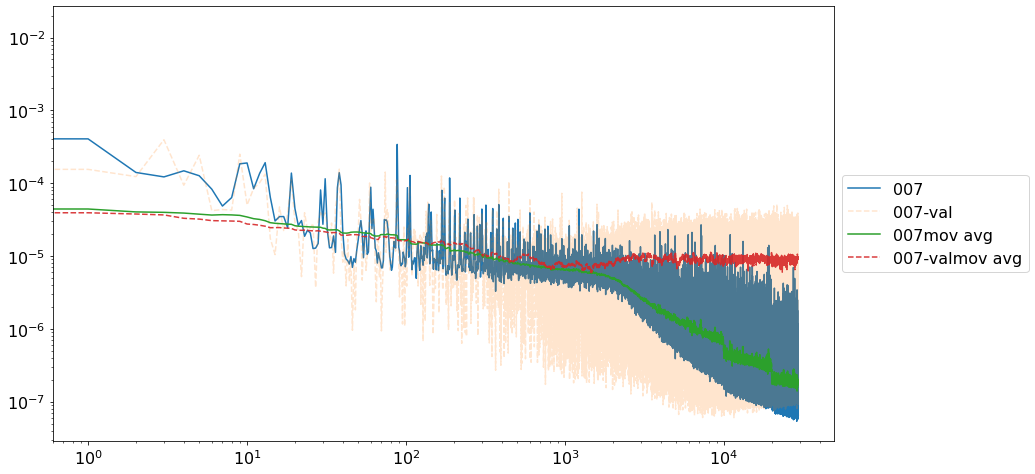

In [15]:
plt.figure(figsize=(14, 8))

key = '007'
plt.plot(data[key]['loss'], label=key)
plt.plot(data[key]['epoch'], data[key]['val_loss'], label=key+"-val", ls='--', alpha=0.2)


plt.plot(moving_average(data[key]['loss'], 100), label=key+'mov avg')
plt.plot(moving_average(data[key]['val_loss'], 100), label=key+"-val"+'mov avg', ls='--', alpha=0.9)


plt.yscale('log')
plt.xscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()